In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path_db = "../ECG_DATASET/dataset_ekg.csv"
data = pd.read_csv(path_db)
data.head()


0         1         2         3         4         5         6  \
0 -0.064515 -0.059515 -0.029515 -0.019515 -0.014515 -0.014515 -0.019515   
1  0.245485  0.250485  0.240485  0.230485  0.240485  0.240485  0.250485   
2  0.130485  0.125485  0.110485  0.100485  0.105485  0.115485  0.120485   
3 -0.499515 -0.409515 -0.394515 -0.419515 -0.469515 -0.504515 -0.559515   
4  0.245485  0.265485  0.255485  0.250485  0.230485  0.235485  0.245485   

          7         8         9  ...      3591      3592      3593      3594  \
0 -0.009515  0.020485  0.030485  ...  0.125485  0.130485  0.120485  0.110485   
1  0.235485  0.215485  0.220485  ...  0.390485  0.375485  0.375485  0.385485   
2  0.095485  0.090485  0.085485  ... -0.139515 -0.144515 -0.164515 -0.159515   
3 -0.589515 -0.614515 -0.639515  ... -0.694515 -0.709515 -0.699515 -0.689515   
4  0.280485  0.270485  0.275485  ...  0.115485  0.110485  0.120485  0.130485   

       3595      3596      3597      3598      3599  target  
0  0.110485  0.120485  0.135485  0.130485  0.115485     NSR  
1  0.370485  0.355485  0.340485  0.335485  0.315485     NSR  
2 -0.169515 -0.189515 -0.204515 -0.204515 -0.204515     NSR  
3 -0.669515 -0.684515 -0.694515 -0.694515 -0.674515     NSR  
4  0.140485  0.135485  0.120485  0.110485  0.120485     NSR  

[5 rows x 3601 columns]

In [3]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '3591', '3592', '3593', '3594', '3595', '3596', '3597', '3598', '3599',
       'target'],
      dtype='object', length=3601)

In [11]:
classes = data.target.unique()
classes.sort()
classes

array(['AFIB', 'AFL', 'APB', 'Bigeminy', 'Fusion', 'IVR', 'LBBBB', 'NSR',
       'PR', 'PVC', 'RBBBB', 'SDHB', 'SVTA', 'Trigeminy', 'VFL', 'VT',
       'WPW'], dtype=object)

In [12]:
classes_slected = ["Bigeminy", "Trigeminy", "NSR"]
data_selected = data[(data.target.isin(classes_slected))]
data_selected.head()

0         1         2         3         4         5         6  \
0 -0.064515 -0.059515 -0.029515 -0.019515 -0.014515 -0.014515 -0.019515   
1  0.245485  0.250485  0.240485  0.230485  0.240485  0.240485  0.250485   
2  0.130485  0.125485  0.110485  0.100485  0.105485  0.115485  0.120485   
3 -0.499515 -0.409515 -0.394515 -0.419515 -0.469515 -0.504515 -0.559515   
4  0.245485  0.265485  0.255485  0.250485  0.230485  0.235485  0.245485   

          7         8         9  ...      3591      3592      3593      3594  \
0 -0.009515  0.020485  0.030485  ...  0.125485  0.130485  0.120485  0.110485   
1  0.235485  0.215485  0.220485  ...  0.390485  0.375485  0.375485  0.385485   
2  0.095485  0.090485  0.085485  ... -0.139515 -0.144515 -0.164515 -0.159515   
3 -0.589515 -0.614515 -0.639515  ... -0.694515 -0.709515 -0.699515 -0.689515   
4  0.280485  0.270485  0.275485  ...  0.115485  0.110485  0.120485  0.130485   

       3595      3596      3597      3598      3599  target  
0  0.110485  0.120485  0.135485  0.130485  0.115485     NSR  
1  0.370485  0.355485  0.340485  0.335485  0.315485     NSR  
2 -0.169515 -0.189515 -0.204515 -0.204515 -0.204515     NSR  
3 -0.669515 -0.684515 -0.694515 -0.694515 -0.674515     NSR  
4  0.140485  0.135485  0.120485  0.110485  0.120485     NSR  

[5 rows x 3601 columns]

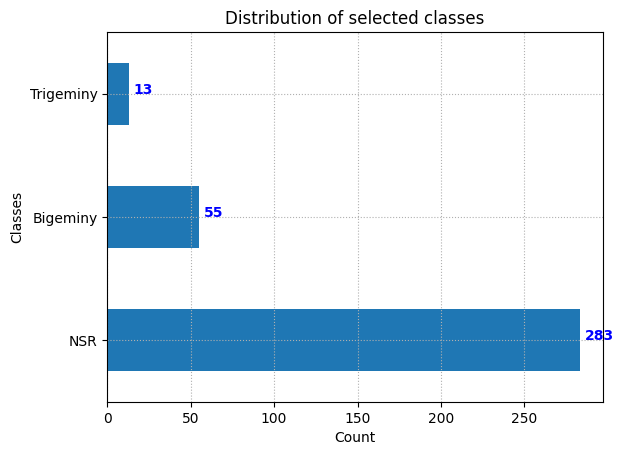

In [15]:
# plot count of each class
data_selected.target.value_counts().plot(kind='barh')
#plt.show()
plt.grid(ls=":")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.title("Distribution of selected classes")
# add value count on bars
for i, v in enumerate(data_selected.target.value_counts()):
    plt.text(v + 3, i, str(v), color='blue', fontweight='bold')

plt.show()

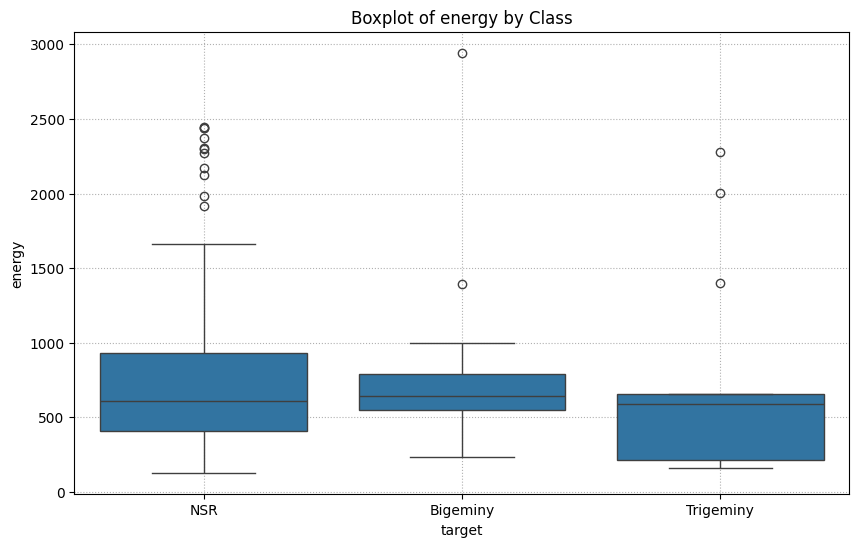

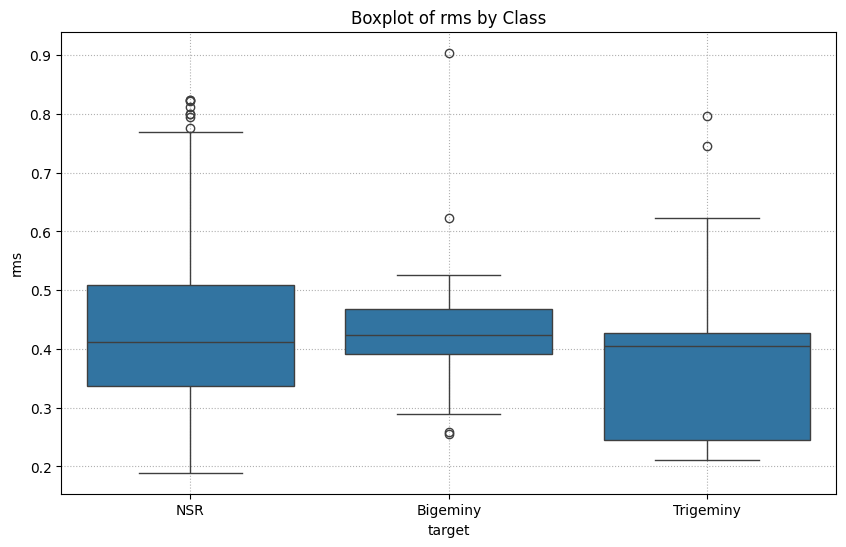

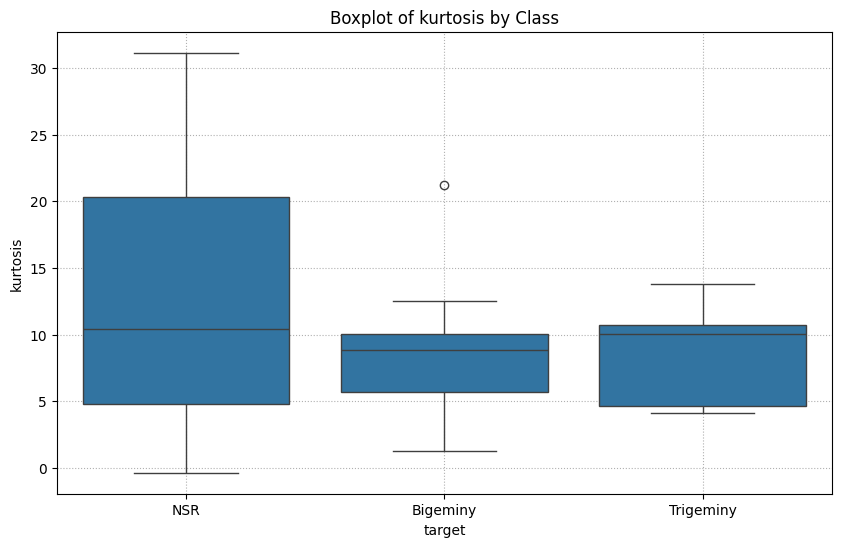

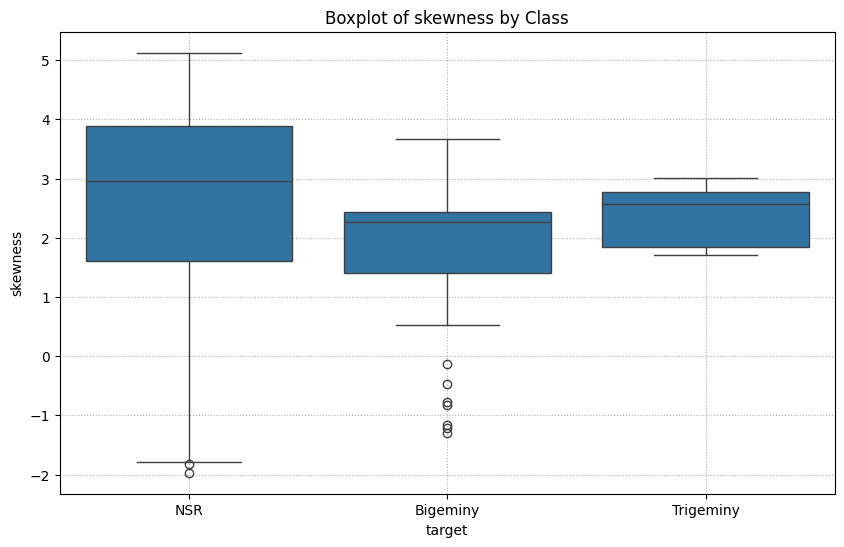

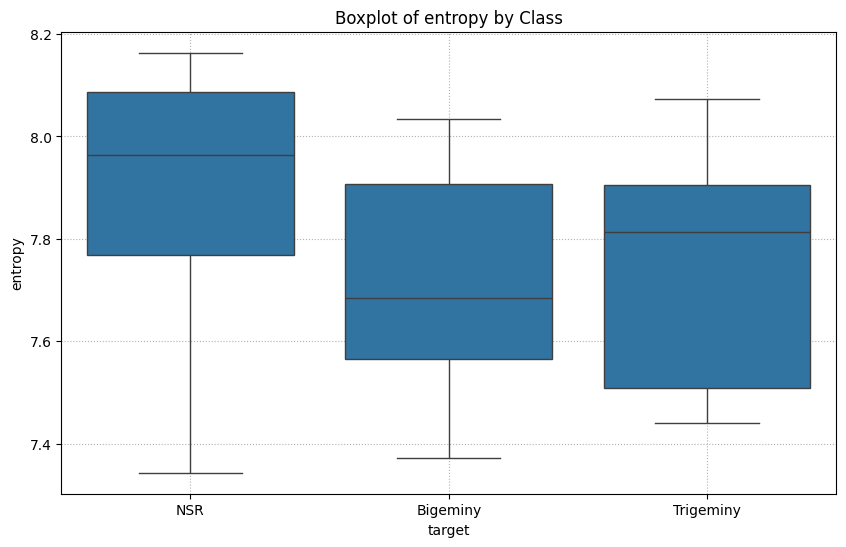

In [24]:
# de las clases de data_selected, quiero que tomes valores de su energia, rms, kurtosis, skewness, etc, de cada señal por clase, para ver si no existen outliers por clase. Usa tecnicas de visualizacion como boxplot, violinplot, etc.
import seaborn as sns
from scipy.stats import kurtosis, skew
from scipy.stats import entropy as scipy_entropy

def calculate_features(signal):
    """Calcula features de una señal ECG"""
    # Asegurar que la señal es float
    signal = np.array(signal, dtype=float)
    energy = np.sum(signal**2)
    rms = np.sqrt(np.mean(signal**2))
    kurt = kurtosis(signal)
    skewness = skew(signal)
    # Normalizar para calcular entropía
    signal_norm = np.abs(signal) / (np.max(np.abs(signal)) + 1e-10)
    ent = scipy_entropy(signal_norm)
    
    return {
        'energy': energy,
        'rms': rms,
        'kurtosis': kurt,
        'skewness': skewness,
        'entropy': ent
    }

# Calcular features para cada señal
features_list = []
for idx, row in data_selected.iterrows():
    # Obtener la señal (todas las columnas excepto 'target')
    signal = row.drop('target').values.astype(float)
    features_dict = calculate_features(signal)
    features_dict['target'] = row['target']
    features_list.append(features_dict)

data_with_features = pd.DataFrame(features_list)

# Visualizar features por clase
features = ['energy', 'rms', 'kurtosis', 'skewness', 'entropy']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target', y=feature, data=data_with_features)
    plt.title(f'Boxplot of {feature} by Class')
    plt.grid(ls=":")
    plt.show()

In [35]:
# elimina outliers usando el metodo IQR para cada feature y clase, pero retorna la señal original filtrada

def remove_outliers_iqr(df_features, df_original, feature, class_label):
    """Elimina outliers usando el método IQR para una feature específica y clase.
    Retorna los índices de las filas sin outliers."""
    class_data = df_features[df_features['target'] == class_label]
    Q1 = class_data[feature].quantile(0.25)
    Q3 = class_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Obtener índices sin outliers
    valid_indices = class_data[(class_data[feature] >= lower_bound) & (class_data[feature] <= upper_bound)].index
    return valid_indices

# Mantener índices válidos para cada clase
valid_indices_all = set()

for class_label in classes_slected:
    # Obtener índices de la clase actual
    class_indices = set(data_with_features[data_with_features['target'] == class_label].index)
    
    # Filtrar por cada feature
    valid_for_class = class_indices.copy()
    for feature in features:
        valid_indices = set(remove_outliers_iqr(data_with_features, data_selected, feature, class_label))
        valid_for_class = valid_for_class.intersection(valid_indices)
    
    valid_indices_all.update(valid_for_class)

# Crear dataframe filtrada con las señales originales
data_signals_filtered = data_selected.iloc[list(valid_indices_all)].reset_index(drop=True)

print(f"Señales originales: {len(data_selected)}")
print(f"Señales después de eliminar outliers: {len(data_signals_filtered)}")
print(f"\nDistribución por clase:")
print(data_signals_filtered['target'].value_counts())
data_signals_filtered.head()

Señales originales: 351
Señales después de eliminar outliers: 325

Distribución por clase:
target
NSR          270
Bigeminy      45
Trigeminy     10
Name: count, dtype: int64


0         1         2         3         4         5         6  \
0 -0.064515 -0.059515 -0.029515 -0.019515 -0.014515 -0.014515 -0.019515   
1  0.245485  0.250485  0.240485  0.230485  0.240485  0.240485  0.250485   
2  0.130485  0.125485  0.110485  0.100485  0.105485  0.115485  0.120485   
3 -0.499515 -0.409515 -0.394515 -0.419515 -0.469515 -0.504515 -0.559515   
4  0.245485  0.265485  0.255485  0.250485  0.230485  0.235485  0.245485   

          7         8         9  ...      3591      3592      3593      3594  \
0 -0.009515  0.020485  0.030485  ...  0.125485  0.130485  0.120485  0.110485   
1  0.235485  0.215485  0.220485  ...  0.390485  0.375485  0.375485  0.385485   
2  0.095485  0.090485  0.085485  ... -0.139515 -0.144515 -0.164515 -0.159515   
3 -0.589515 -0.614515 -0.639515  ... -0.694515 -0.709515 -0.699515 -0.689515   
4  0.280485  0.270485  0.275485  ...  0.115485  0.110485  0.120485  0.130485   

       3595      3596      3597      3598      3599  target  
0  0.110485  0.120485  0.135485  0.130485  0.115485     NSR  
1  0.370485  0.355485  0.340485  0.335485  0.315485     NSR  
2 -0.169515 -0.189515 -0.204515 -0.204515 -0.204515     NSR  
3 -0.669515 -0.684515 -0.694515 -0.694515 -0.674515     NSR  
4  0.140485  0.135485  0.120485  0.110485  0.120485     NSR  

[5 rows x 3601 columns]

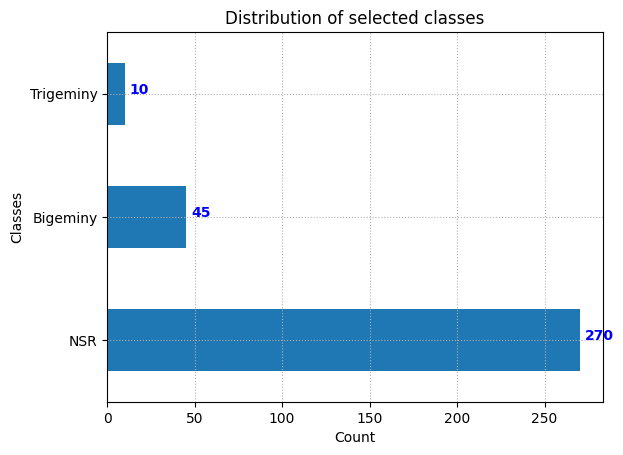

In [37]:
# grafica lacantidad de señales por clases  usa data_signals_filtered
plt.figure()
data_signals_filtered['target'].value_counts().plot(kind="barh")
plt.grid(ls=":")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.title("Distribution of selected classes")
# add value count on bars
for i, v in enumerate(data_signals_filtered.target.value_counts()):
    plt.text(v + 3, i, str(v), color='blue', fontweight='bold')

plt.show()

# OVERSAMPLING

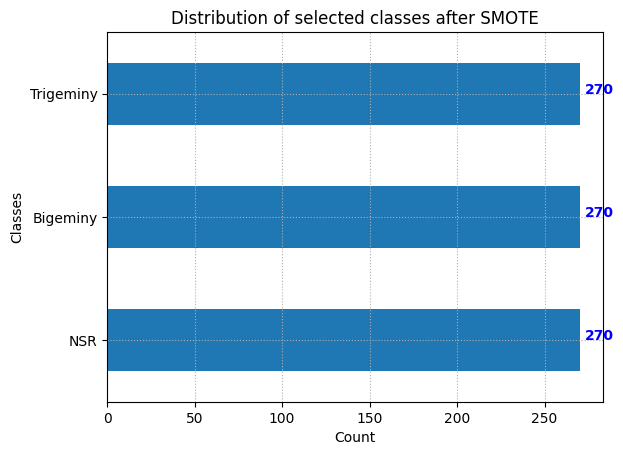

In [38]:
# de data_selected aumenta los datos de las clases seleccionadas minoritarias como Trigeminy y Bigeminy para balancear el dataset, considera el aumento de los datos usando la libreria imbalanced-learn usando SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

X = data_signals_filtered.drop(columns=["target"])
y = data_signals_filtered["target"]

smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

data_resampled = pd.concat([X_res, y_res], axis=1)
data_resampled.head()
data_resampled.target.value_counts().plot(kind='barh')


plt.grid(ls=":")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.title("Distribution of selected classes after SMOTE")
# add value count on bars
for i, v in enumerate(data_resampled.target.value_counts()):
    plt.text(v + 3, i, str(v), color='blue', fontweight='bold')
plt.show()
#data_resampled.to_csv("../ECG_DATASET/dataset_ekg_resampled.csv", index=False)
#data_resampled.head()
#data_resampled.target.value_counts()


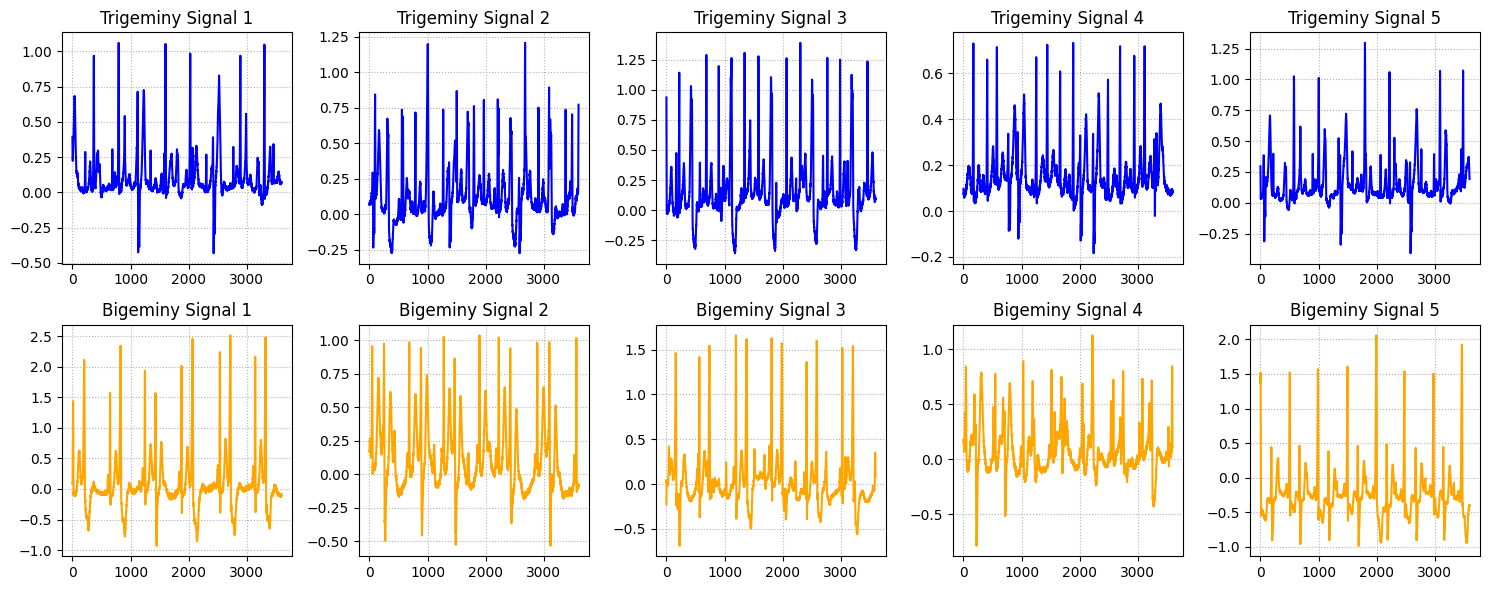

In [48]:
# grafica 10 señales de ECG de la clase Trigeminy y Bigeminy despues del aumento de datos con SMOTE, enfocandose en las señales generadas sinteticamente con smote de cada clase
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

trigeminy_signals = data_resampled[data_resampled.target == "Trigeminy"].sample(10, random_state=42)
bigeminy_signals = data_resampled[data_resampled.target == "Bigeminy"].sample(10, random_state=42)

for i in range(5):
    axs[0, i].plot(trigeminy_signals.iloc[i, :-1].values, color='blue')
    axs[0, i].set_title("Trigeminy Signal {}".format(i+1))
    axs[0, i].grid(ls=":")
    axs[1, i].plot(bigeminy_signals.iloc[i, :-1].values, color='orange')
    axs[1, i].set_title("Bigeminy Signal {}".format(i+1))
    axs[1, i].grid(ls=":")
plt.tight_layout()
plt.show()


In [49]:
# Quiero que crees un folder que contenga 3 folders por clase, dentro de estos ultimos folders quiero que guardes las imagenes de las señales ECG generadas sinteticamente por SMOTE, cada imagen debe tener un nombre unico que identifique la clase y un numero secuencial.
import os
output_dir = "synthetic_ecg_signals"

os.makedirs(output_dir, exist_ok=True)

for class_label in classes_slected:
    class_dir = os.path.join(output_dir, class_label)
    os.makedirs(class_dir, exist_ok=True)
    
    class_signals = data_resampled[data_resampled['target'] == class_label]
    
    for idx, row in class_signals.iterrows():
        signal = row.drop('target').values.astype(float)
        
        plt.figure(figsize=(6, 4))
        plt.plot(signal, color='blue' if class_label == "Trigeminy" else 'orange' if class_label == "Bigeminy" else 'green')
        plt.title(f'Synthetic ECG Signal - {class_label}')
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')
        plt.grid(ls=":")
        
        filename = f"{class_label}_{idx}.png"
        filepath = os.path.join(class_dir, filename)
        plt.savefig(filepath)
        plt.close()
##!/usr/bin/env python3
#import os
#import pickle
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd


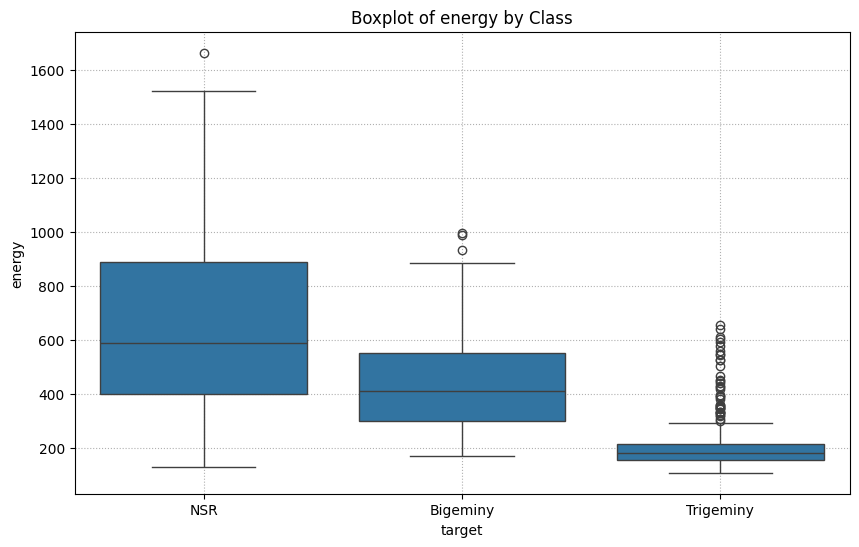

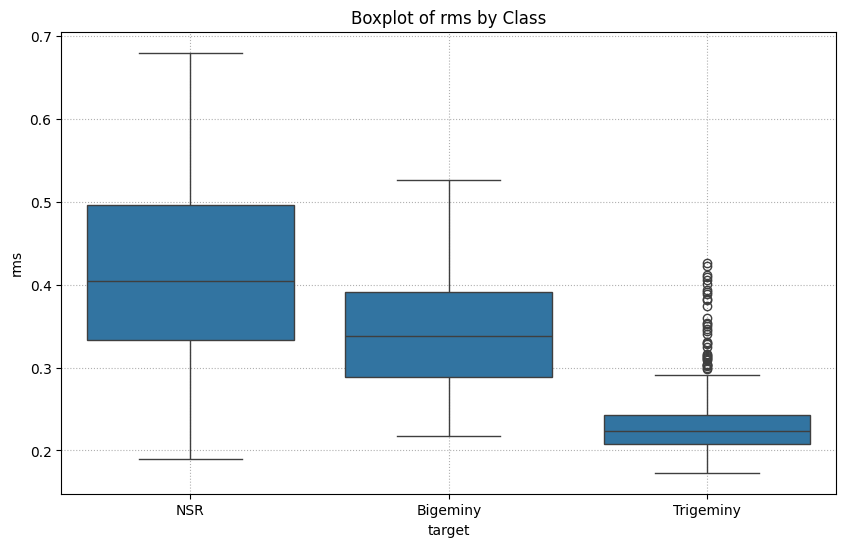

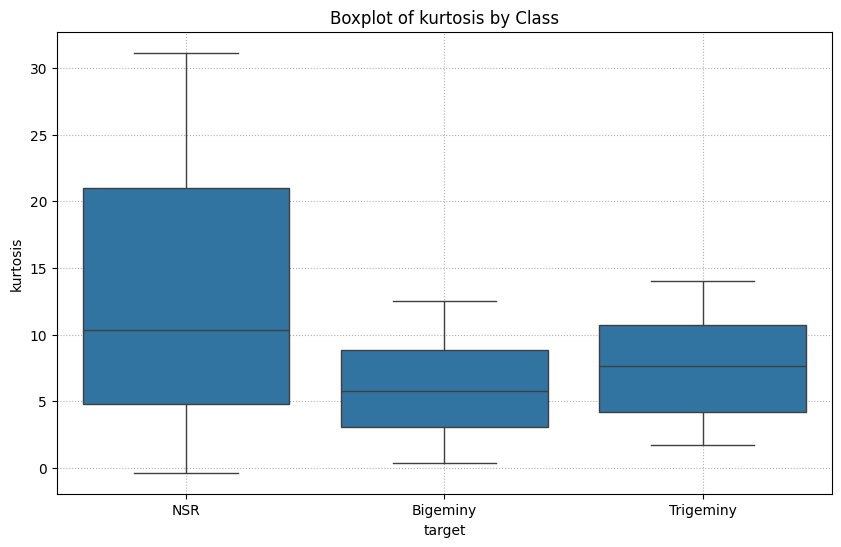

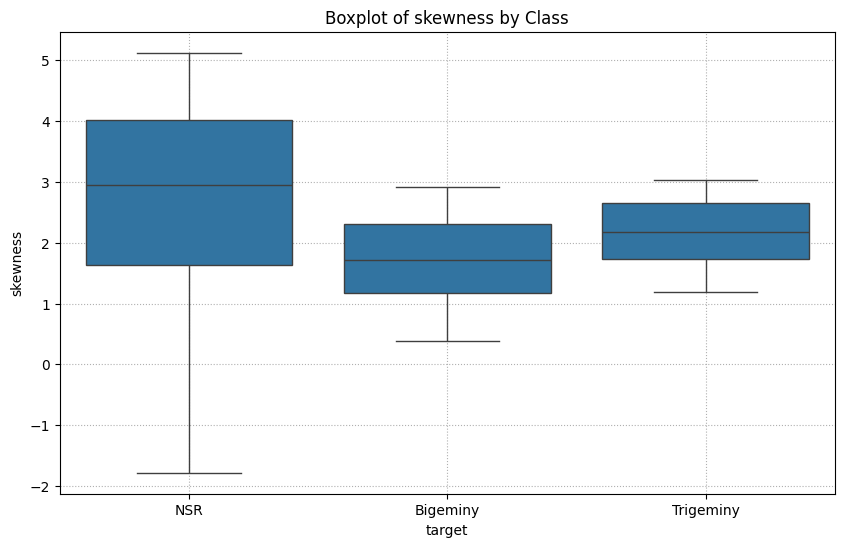

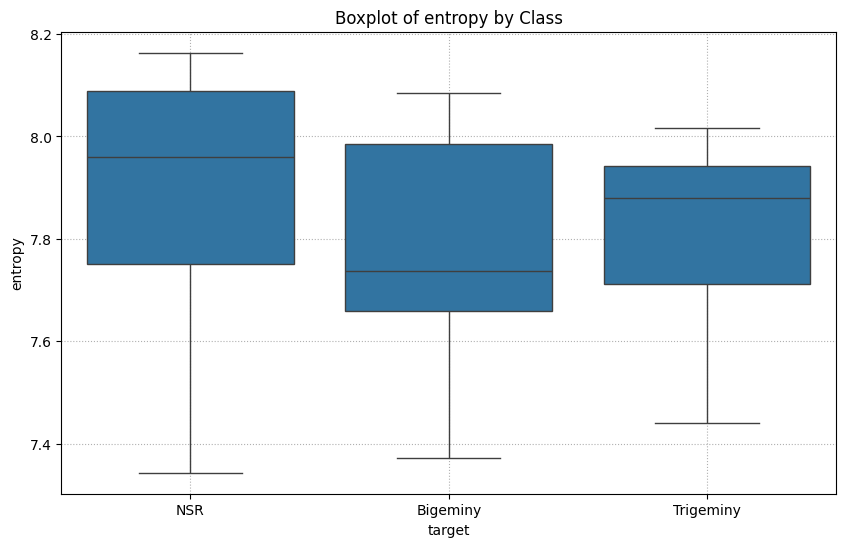

In [40]:
#de las clases de data_resampled, quiero que tomes valores de su energia, rms, kurtosis, skewness, etc, de cada señal por clase, para ver si no existen outliers por clase. Usa tecnicas de visualizacion como boxplot, violinplot, etc.
# Calcular features para cada señal
features_list = []
for idx, row in data_resampled.iterrows():
    # Obtener la señal (todas las columnas excepto 'target')
    signal = row.drop('target').values.astype(float)
    features_dict = calculate_features(signal)
    features_dict['target'] = row['target']
    features_list.append(features_dict)

data_with_features = pd.DataFrame(features_list)

# Visualizar features por clase
features = ['energy', 'rms', 'kurtosis', 'skewness', 'entropy']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target', y=feature, data=data_with_features)
    plt.title(f'Boxplot of {feature} by Class')
    plt.grid(ls=":")
    plt.show()

In [51]:
# Mantener índices válidos para cada clase
valid_indices_all = set()

for class_label in classes_slected:
    # Obtener índices de la clase actual
    class_indices = set(data_with_features[data_with_features['target'] == class_label].index)
    
    # Filtrar por cada feature
    valid_for_class = class_indices.copy()
    for feature in features:
        valid_indices = set(remove_outliers_iqr(data_with_features, data_resampled, feature, class_label))
        valid_for_class = valid_for_class.intersection(valid_indices)
    
    valid_indices_all.update(valid_for_class)

# Crear dataframe filtrada con las señales originales
data_signals_filtered = data_resampled.iloc[list(valid_indices_all)].reset_index(drop=True)

print(f"Señales originales: {len(data_resampled)}")
print(f"Señales después de eliminar outliers: {len(data_signals_filtered)}")
print(f"\nDistribución por clase:")
print(data_signals_filtered['target'].value_counts())
data_signals_filtered.head()

Señales originales: 810
Señales después de eliminar outliers: 768

Distribución por clase:
target
NSR          269
Bigeminy     267
Trigeminy    232
Name: count, dtype: int64


0         1         2         3         4         5         6  \
0 -0.064515 -0.059515 -0.029515 -0.019515 -0.014515 -0.014515 -0.019515   
1  0.245485  0.250485  0.240485  0.230485  0.240485  0.240485  0.250485   
2  0.130485  0.125485  0.110485  0.100485  0.105485  0.115485  0.120485   
3 -0.499515 -0.409515 -0.394515 -0.419515 -0.469515 -0.504515 -0.559515   
4  0.245485  0.265485  0.255485  0.250485  0.230485  0.235485  0.245485   

          7         8         9  ...      3591      3592      3593      3594  \
0 -0.009515  0.020485  0.030485  ...  0.125485  0.130485  0.120485  0.110485   
1  0.235485  0.215485  0.220485  ...  0.390485  0.375485  0.375485  0.385485   
2  0.095485  0.090485  0.085485  ... -0.139515 -0.144515 -0.164515 -0.159515   
3 -0.589515 -0.614515 -0.639515  ... -0.694515 -0.709515 -0.699515 -0.689515   
4  0.280485  0.270485  0.275485  ...  0.115485  0.110485  0.120485  0.130485   

       3595      3596      3597      3598      3599  target  
0  0.110485  0.120485  0.135485  0.130485  0.115485     NSR  
1  0.370485  0.355485  0.340485  0.335485  0.315485     NSR  
2 -0.169515 -0.189515 -0.204515 -0.204515 -0.204515     NSR  
3 -0.669515 -0.684515 -0.694515 -0.694515 -0.674515     NSR  
4  0.140485  0.135485  0.120485  0.110485  0.120485     NSR  

[5 rows x 3601 columns]

In [52]:
data_signals_filtered.to_csv("../ECG_DATASET/dataset_ekg_resampled_no_outliers.csv", index=False)